In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# Load JSON

In [2]:
f = open('data.json')
data = json.load(f)

In [3]:
check_df = pd.json_normalize(data[1]) 
check_df.head()

,Date,Campaign code,Campaign description,Material Ax1,Material Ax2,Material Ax3,Magnetron Ax1,Magnetron Ax2,Magnetron Ax3,Power Supply Ax1,...,Voltage_Ax1_[V] STD,Actual_Power_Ax2_[W] Mean,Actual_Power_Ax2_[W] STD,Voltage_Ax2_[V] Mean,Voltage_Ax2_[V] STD,Actual_Power_Ax3_[W] Mean,Actual_Power_Ax3_[W] STD,Voltage_Ax3_[V] Mean,Voltage_Ax3_[V] STD,_id.$oid
0,02/16/2024,BaZrSn_001,"Sputter setup with Ba, Zr and Sn for developme...",Ba,Zr,Sn,5,1,3,5,...,0,0,0,0.455,0.107,30.848,1.018,284.046,0.908,65cf64c2cb844759ce4fb722


In [4]:

ddf = pd.DataFrame({
    'Voltage_Ax1_[V]': check_df['Voltage_Ax1_[V]'].values[0],
    'Voltage_Ax2_[V]': check_df['Voltage_Ax2_[V]'].values[0],
    'Voltage_Ax3_[V]': check_df['Voltage_Ax3_[V]'].values[0]
})
ddf.head()

,Voltage_Ax1_[V],Voltage_Ax2_[V],Voltage_Ax3_[V]
0,0,0.429,287.865
1,0,0.429,287.865
2,0,0.429,287.865
3,0,0.429,287.865
4,0,0.429,287.865


# Define parameters

In [5]:
t = 0.5
t_d = 0.3
sigma_t = 1
n_splits=30

#p1 = 'Voltage_Ax1_[V]'
#p2 = 'Voltage_Ax2_[V]'
p3 = 'Voltage_Ax3_[V]'

#params = [p1,p2,p3]
params = [p3]

Experiment 1: Length 94, n_t = 47, classified as steady at iteration 15
Experiment 2: Length 94, n_t = 47, classified as steady at iteration 5
Experiment 3: Length 94, n_t = 47, classified as steady at iteration 18
Experiment 4: Length 94, n_t = 47, classified as steady at iteration 15
Experiment 5: Length 94, n_t = 47, classified as steady at iteration 16
Experiment 6: Length 94, n_t = 47, classified as steady at iteration 16
Experiment 7: Length 94, n_t = 47, classified as steady at iteration 13
Experiment 8: Length 94, n_t = 47, classified as steady at iteration 17
Experiment 9: Length 94, n_t = 47, classified as steady at iteration 15
Experiment 10: Length 94, n_t = 47, classified as steady at iteration 13
Experiment 11: Length 93, n_t = 46, classified as steady at iteration 13
Experiment 12: Length 94, n_t = 47, classified as steady at iteration 18


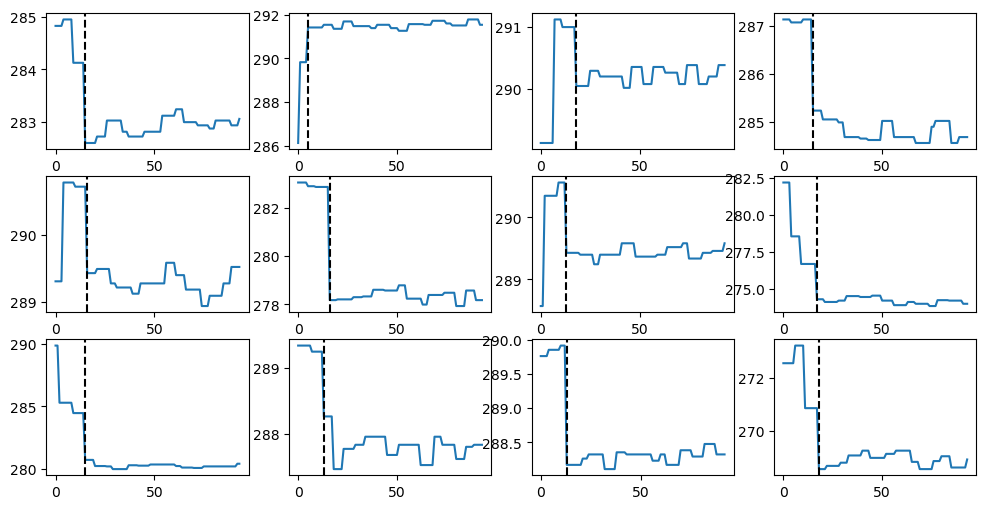

In [6]:
plt.rcParams['figure.figsize'] = [12, 6]
fig = plt.figure()
fig.tight_layout()

# Pick 12 random experiments
indices = np.random.randint(low=0, high=96, size=12, dtype=int)

for i in range(len(indices)):
     
    experiment = pd.json_normalize(data[indices[i]])
    
    df = pd.DataFrame({
        #p1 : experiment[p1].values[0],
        #p2 : experiment[p2].values[0],
        p3 : experiment[p3].values[0]
    })
    
    rows = len(df.axes[0])
    cols = len(df.axes[1])

    # Find steady state threshold as index
    n_t = int(t*rows)

    # Find steady state drag threshold as index
    n_td = int(t_d*rows)

    # Plot voltages
    xs = df.index
    #ys1 = df[p1]
    #ys2 = df[p2]
    ys3 = df[p3]

    plt.subplot(3, 4, i+1)
    #plt.plot(xs,ys1)
    #plt.plot(xs,ys2)
    plt.plot(xs,ys3)

    '''for j in range(0, n_t + n_td):

        if all(df[p].tail(rows-j).std() <= sigma_t for p in params):
            plt.axvline(x = j, color='black', linestyle='dashed')
            if (j <= n_t):
                print(f'Experiment {i+1}: Length {rows}, n_t = {n_t}, classified as steady at iteration {j}')
                break
            else:
                print(f'RERUN experiment {i+1}: Length {rows}, n_td = {n_td}, at iteration {j}')
                break'''
    
    '''std_splits = [np.std(k) for k in np.array_split(df[p3].values, n_splits)]
    t_index = np.round(t*len(std_splits)).astype(int)
    t_d_index = np.round(t_d*len(std_splits)).astype(int)
    for j in range(0, t_d_index):
        if np.all(np.array(std_splits[j:]) <= sigma_t):
            plt.axvline(x = j*n_splits, color='black', linestyle='dashed')
            print(f'Experiment {i+1}: Length {rows}, classified as steady at split {j}, iteration: {j*n_splits}')
            break'''
    
    for j in range(0, n_t + n_td):
        tail = df[p3].tail(rows-j).values
        sq_err = np.power((tail - np.mean(tail)), 2)
        if np.all(sq_err <= 0.5):
            plt.axvline(x = j, color='black', linestyle='dashed')
            if (j <= n_t):
                print(f'Experiment {i+1}: Length {rows}, n_t = {n_t}, classified as steady at iteration {j}')
                break
            else:
                print(f'RERUN experiment {i+1}: Length {rows}, n_td = {n_td}, at iteration {j}')
                break
    
    '''tail = df[p3].values
    print(np.power((tail - np.mean(tail)), 2))'''
        
        

plt.show()

## Will rework the steady classifier to chunk instead of window

In [7]:
# [np.std(i) for i in np.array_split(x, 4)]
# if std from before t to end of arr < threshold: stable
# if std from t to t_drag: rerun

# TODO: figure out the formula for mapping time percentage to entry in x_split

In [8]:
x = np.arange(19)
x_split = [np.std(i) for i in np.array_split(x, 5)]
x_split

[1.118033988749895,
 1.118033988749895,
 1.118033988749895,
 1.118033988749895,
 0.816496580927726]

In [9]:
index = np.round(t*len(x_split))


In [10]:
np.all(np.array(x_split[index.astype(int):]) < 1.2)

True

In [11]:
x = np.arange(19)
x_split = [np.std(i) for i in np.array_split(x, 5)]
index = np.round(t*len(x_split))
np.all(np.array(x_split[index.astype(int):]) < 1.2)

True

In [12]:
a = np.array([1, 3, 6, 9, 13])
np.power((a - np.mean(a)), 2)

array([29.16, 11.56,  0.16,  6.76, 43.56])